In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load dataset
data = pd.read_excel("Multiclass-Dataset.xlsx")

# Preprocessing
# Drop the serial number column if it exists
data = data.drop(columns=['S.No'])

# Separating features and target
X = data.drop(columns=['Type'])
y = data['Type']

# Encode the target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)  # One-hot encoding

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)


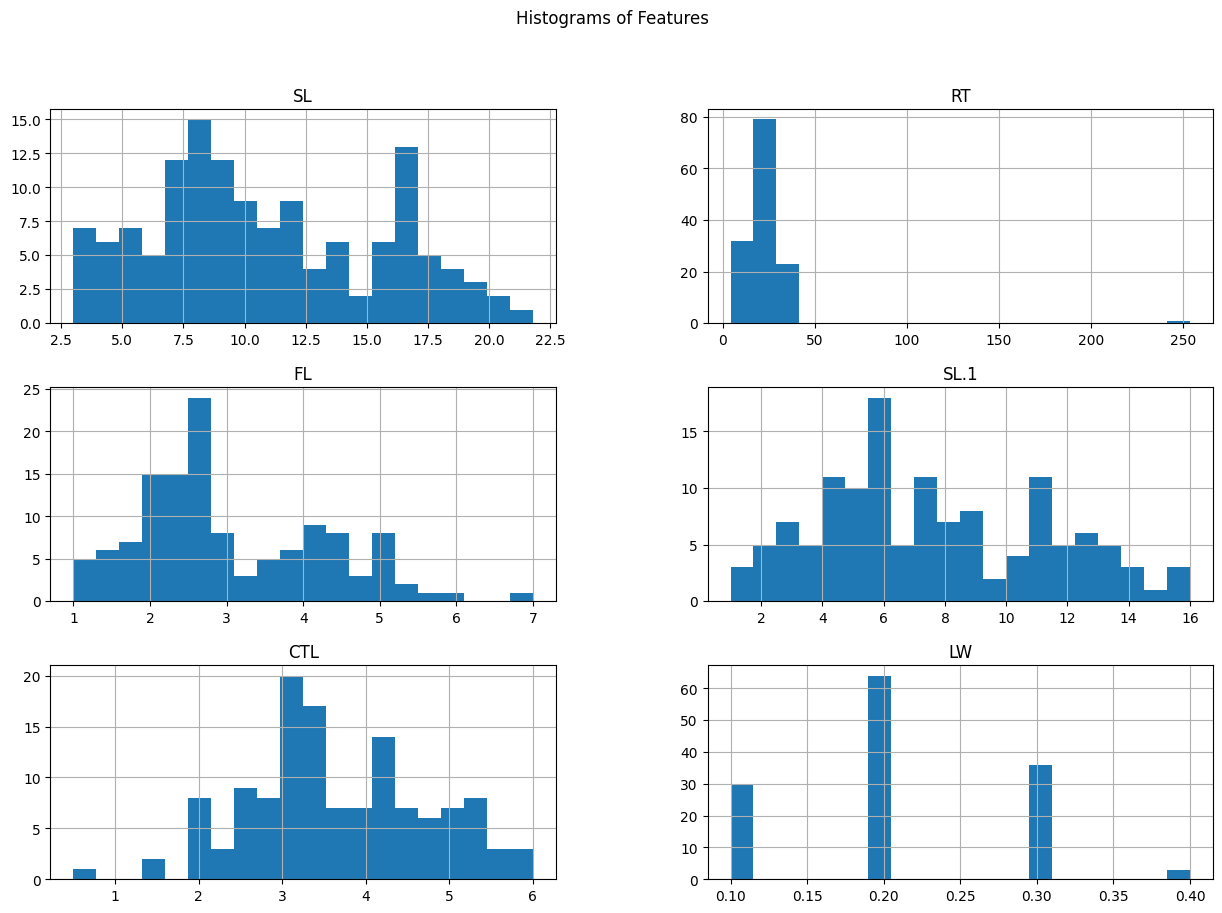

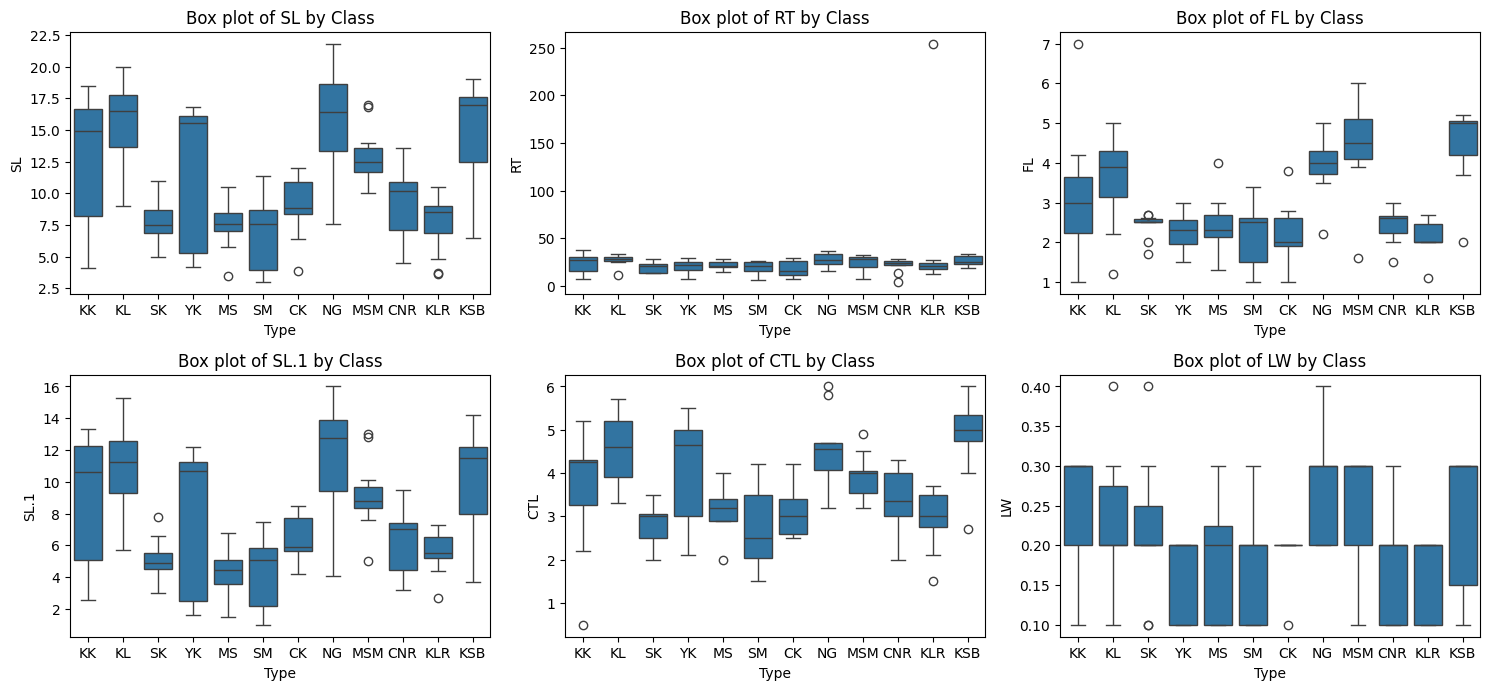

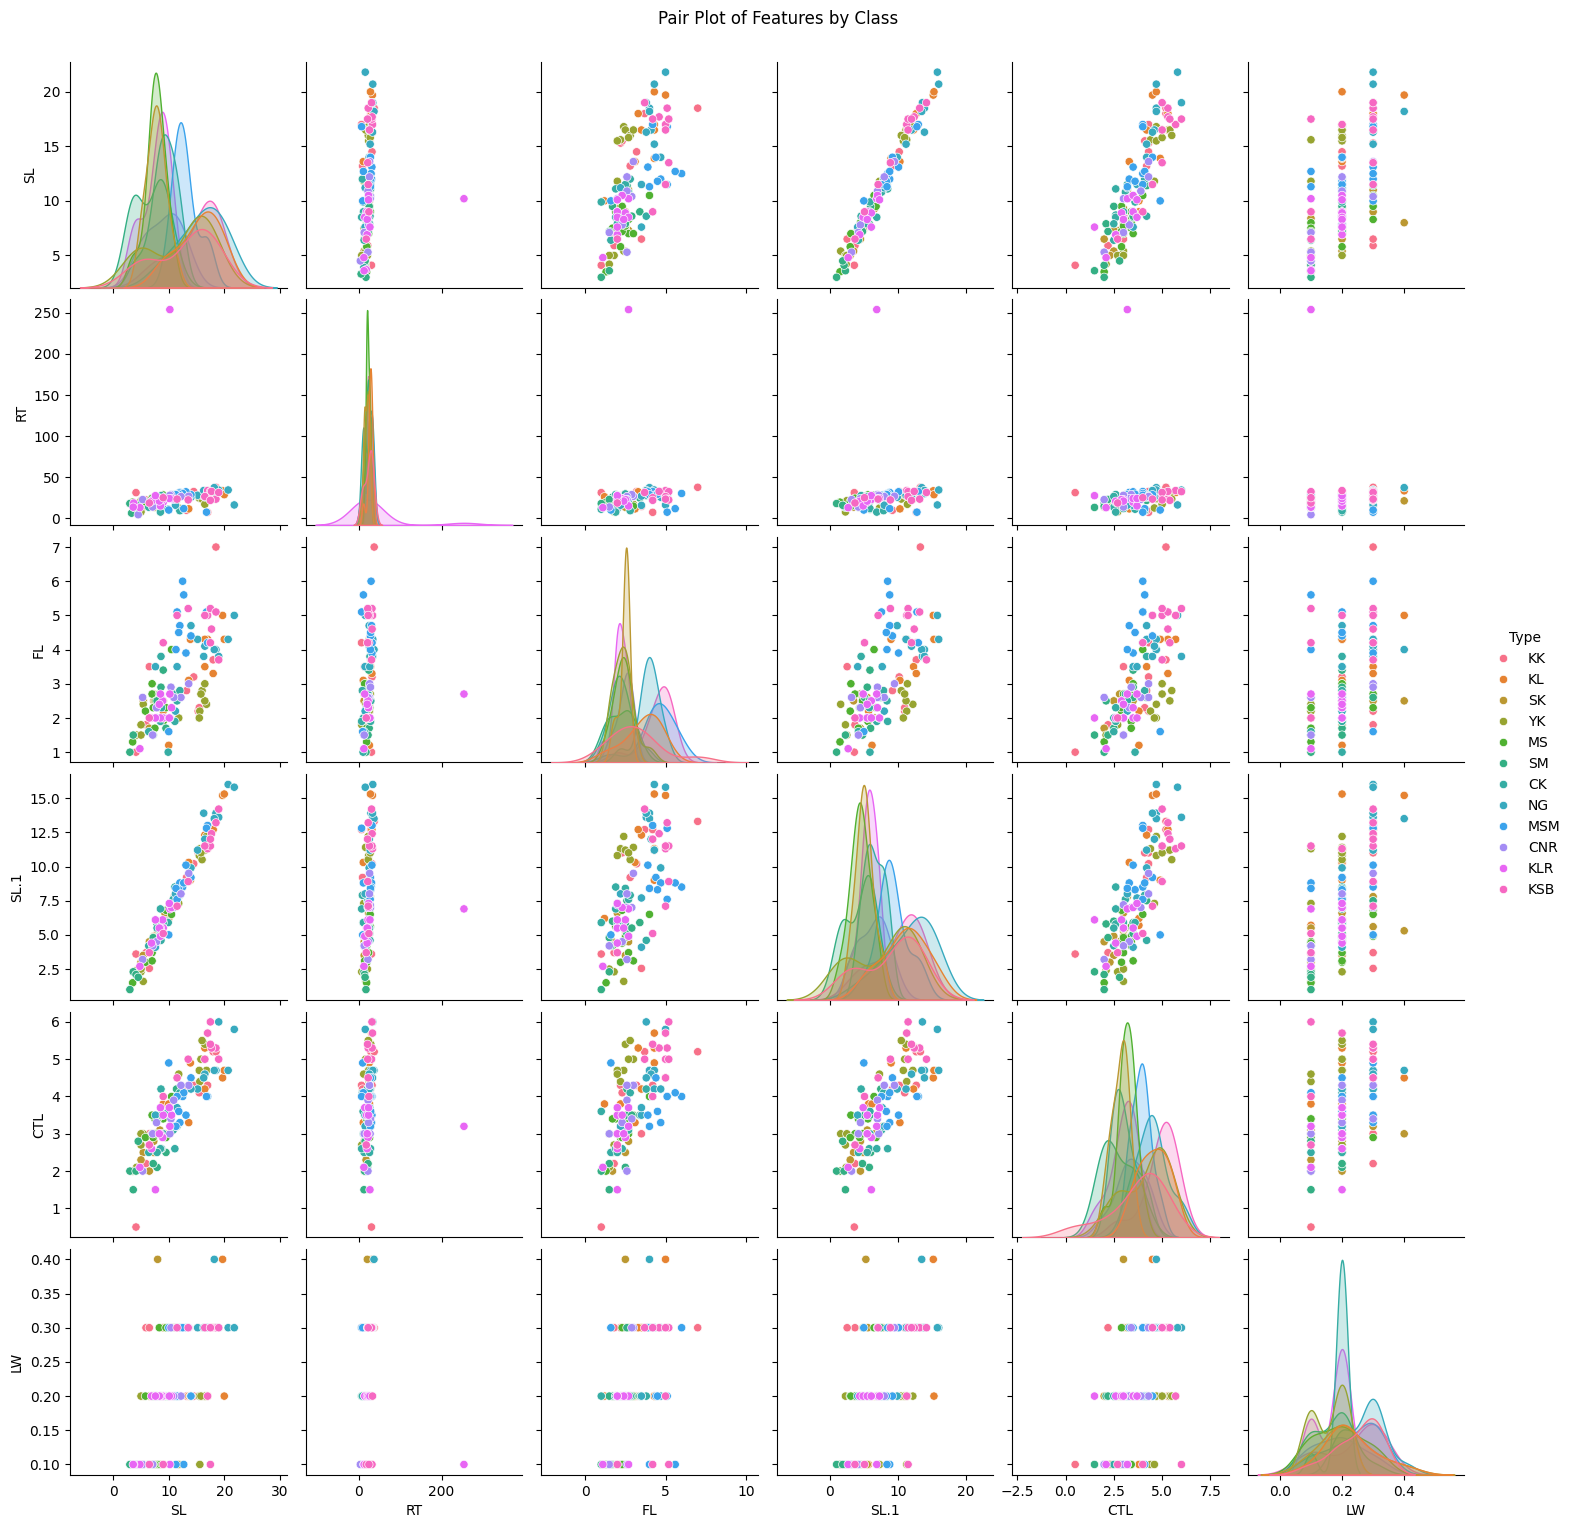

C:\Users\mayan\AppData\Local\Temp\ipykernel_21176\733285130.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=data, palette='Set2')


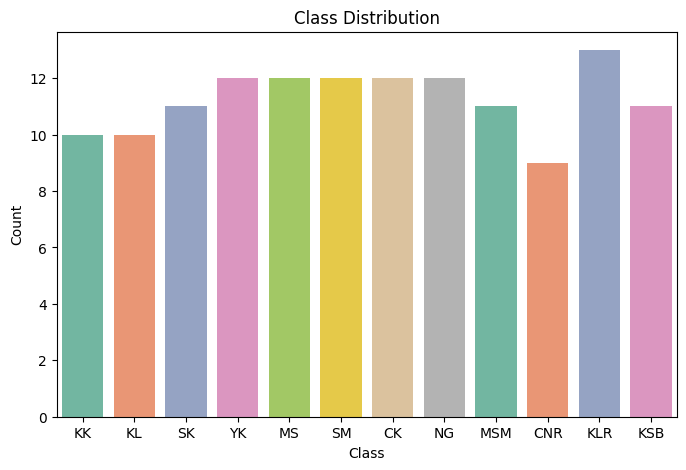

In [1]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_excel("Multiclass-Dataset.xlsx")

# Drop the 'S.No' column if it exists
if 'S.No' in data.columns:
    data = data.drop(columns=['S.No'])

# Histograms for each feature
data.hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Features')
plt.show()

# Box plots for each feature by class
plt.figure(figsize=(15, 10))
for i, column in enumerate(data.columns[:-1]):  # Exclude the target column
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Type', y=column, data=data)
    plt.title(f'Box plot of {column} by Class')
plt.tight_layout()
plt.show()

# Pair plot for pairwise feature relationships
sns.pairplot(data, hue='Type', diag_kind='kde', palette='husl')
plt.suptitle('Pair Plot of Features by Class', y=1.02)
plt.show()

# Count plot for class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Type', data=data, palette='Set2')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


## MLP 1

In [3]:
from tensorflow.keras.callbacks import EarlyStopping

# Define the MLP model
def create_mlp_2(input_shape):
    inputs = Input(shape=input_shape)
    
    x = Dense(128, activation='relu')(inputs)
    x = Dropout(0.4)(x)
    
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.4)(x)
    
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.4)(x)
    
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.4)(x)
    
    outputs = Dense(len(le.classes_), activation='softmax')(x)
    
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate the model
model_2 = create_mlp_2((X_train.shape[1],))
model_2.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
# Adding early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

# Train the model
history_2 = model_2.fit(
    X_train, y_train,
    epochs=100,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 0.0527 - loss: 2.4960 - val_accuracy: 0.0370 - val_loss: 2.4869
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0764 - loss: 2.4844 - val_accuracy: 0.0370 - val_loss: 2.4888
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0579 - loss: 2.4826 - val_accuracy: 0.0370 - val_loss: 2.4917
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.1096 - loss: 2.4813 - val_accuracy: 0.0370 - val_loss: 2.4948
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0868 - loss: 2.4808 - val_accuracy: 0.0370 - val_loss: 2.4978
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0939 - loss: 2.4791 - val_accuracy: 0.0370 - val_loss: 2.5012
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0754 - loss: 2.4782 - val_accuracy: 0.0370 - val_loss: 2.5049
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0939 - loss: 2.4749 - val_accuracy: 0.0370 - val_loss

In [5]:
# Evaluate the model
test_loss, test_acc = model_2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Predict classes for the test set
y_pred = model_2.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)  # Convert one-hot encoded y_test back to class labels

# Print classification report
print(classification_report(y_test_class, y_pred_class, target_names=le.classes_))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0370 - loss: 2.4869
Test accuracy: 0.0370
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
              precision    recall  f1-score   support

          CK       0.04      1.00      0.07         1
         CNR       0.00      0.00      0.00         2
          KK       0.00      0.00      0.00         1
          KL       0.00      0.00      0.00         5
         KLR       0.00      0.00      0.00         2
         KSB       0.00      0.00      0.00         2
          MS       0.00      0.00      0.00         3
         MSM       0.00      0.00      0.00         2
          NG       0.00      0.00      0.00         3
          SK       0.00      0.00      0.00         2
          SM       0.00      0.00      0.00         1
          YK       0.00      0.00      0.00         3

    accuracy                           0.04        27
   macro avg       0.00      0.08      0.01        27
weighted avg       0.00      0.04      0.00        27



C:\Users\mayan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

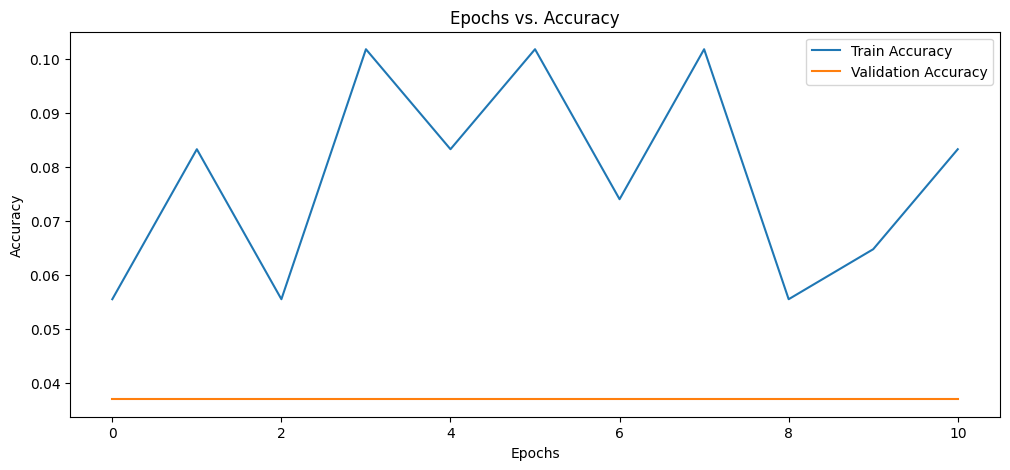

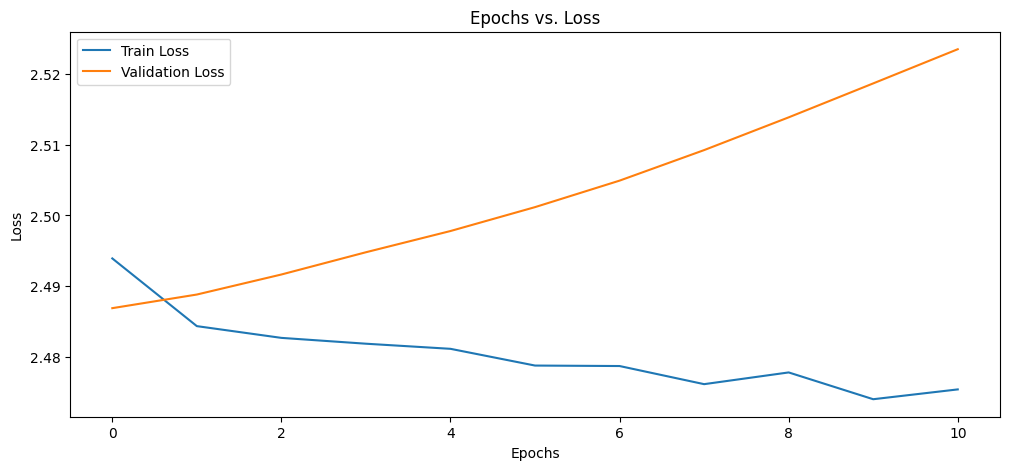

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.plot(history_2.history['accuracy'], label='Train Accuracy')
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epochs vs. Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.plot(history_2.history['loss'], label='Train Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Epochs vs. Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## MLP 2

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define a more complex MLP model
def create_complex_mlp(input_shape):
    inputs = Input(shape=input_shape)
    
    # First dense block
    x = Dense(256, activation='relu')(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    # Second dense block
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    # Third dense block
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    # Fourth dense block
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    # Fifth dense block
    x = Dense(512, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    # Output layer
    outputs = Dense(len(le.classes_), activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Instantiate the complex model
model_complex = create_complex_mlp((X_train.shape[1],))
model_complex.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

history_complex = model_complex.fit(
    X_train, y_train,
    epochs=150,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - accuracy: 0.0939 - loss: 4.0362 - val_accuracy: 0.0370 - val_loss: 2.4895
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.0920 - loss: 4.0926 - val_accuracy: 0.0370 - val_loss: 2.4941
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0868 - loss: 4.0525 - val_accuracy: 0.0370 - val_loss: 2.4995
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.1333 - loss: 3.7089 - val_accuracy: 0.0370 - val_loss: 2.5054
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.0972 - loss: 4.0425 - val_accuracy: 0.0370 - val_loss: 2.5116
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.1167 - loss: 4.0483 - val_accuracy: 0.0370 - val_loss: 2.5179
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.0455 - loss: 4.1897 - val_accuracy: 0.0370 - val_loss: 2.5238
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.0806 - loss: 3.7427 - val_accuracy: 0.0370 - val_loss

In [8]:
# Evaluate the complex model
test_loss, test_acc = model_complex.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Predict classes for the test set
y_pred = model_complex.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_test_class = np.argmax(y_test, axis=1)

# Print classification report
print(classification_report(y_test_class, y_pred_class, target_names=le.classes_))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0370 - loss: 2.4895
Test accuracy: 0.0370
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
              precision    recall  f1-score   support

          CK       0.04      1.00      0.07         1
         CNR       0.00      0.00      0.00         2
          KK       0.00      0.00      0.00         1
          KL       0.00      0.00      0.00         5
         KLR       0.00      0.00      0.00         2
         KSB       0.00      0.00      0.00         2
          MS       0.00      0.00      0.00         3
         MSM       0.00      0.00      0.00         2
          NG       0.00      0.00      0.00         3
          SK       0.00      0.00      0.00         2
          SM       0.00      0.00      0.00         1
          YK       0.00      0.00      0.00         3

    accuracy                           0.04        27
   macro avg       0.00      0.08      0.01        27
weighted avg       0.00      0.04      0.00        27



C:\Users\mayan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mayan\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

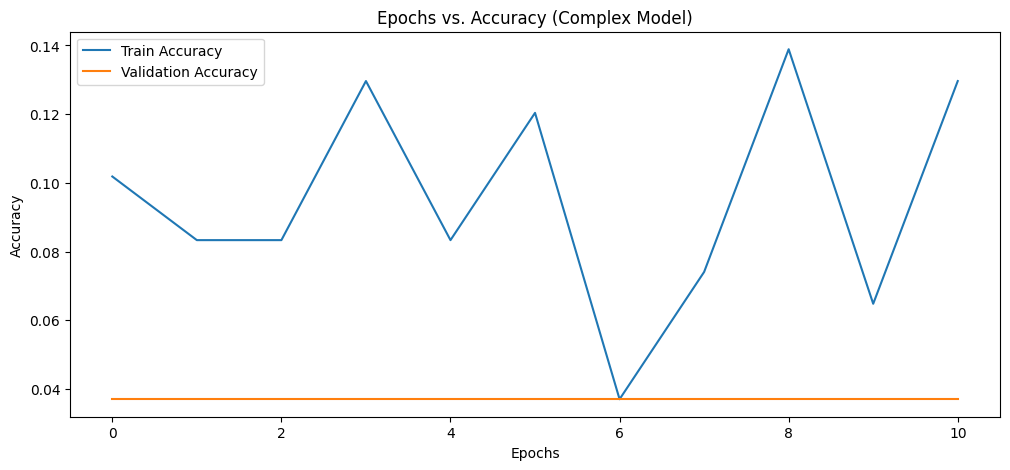

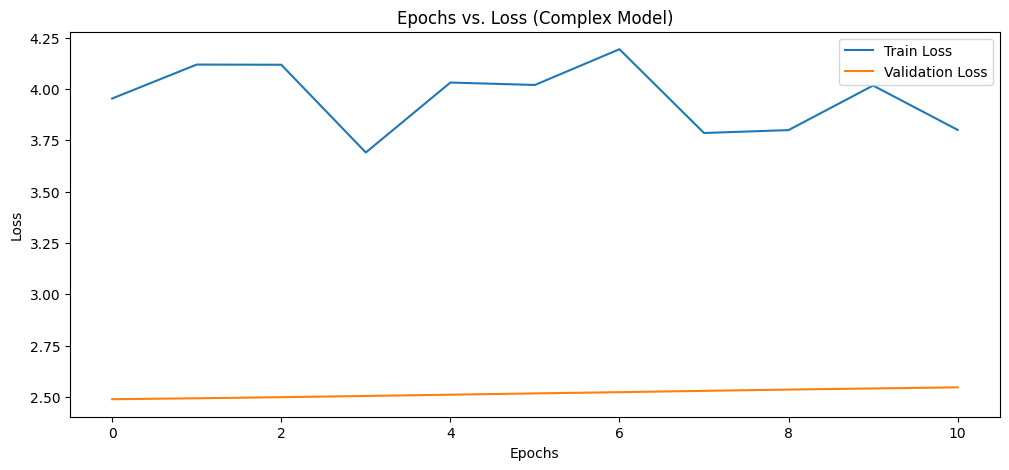

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.plot(history_complex.history['accuracy'], label='Train Accuracy')
plt.plot(history_complex.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epochs vs. Accuracy (Complex Model)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(12, 5))
plt.plot(history_complex.history['loss'], label='Train Loss')
plt.plot(history_complex.history['val_loss'], label='Validation Loss')
plt.title('Epochs vs. Loss (Complex Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Conclusion
Both MLP models struggled to achieve meaningful accuracy improvements, plateauing at approximately 3.7% validation accuracy. MLP 1, with its simpler architecture, showed gradual but limited learning and maintained stability, making it faster to train and less resource-intensive. MLP 2, although more complex with additional layers and neurons, did not yield any performance gain and experienced higher initial loss values, which did not improve accuracy. Given these results, MLP 1 would be the preferred choice due to its efficiency and stability, as increasing complexity in MLP 2 did not translate into better performance on this dataset.